In [ ]:
#importing the respective libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 6
We are given farm_metrics.csv, we need to load it and then do following tasks :

- Compute Mean, median, and variance of plant height
- Correlation between nutrient levels and yield
- Using numpy to generate simulated yield values from a normal distribution
- Compute matrix transpose + inverse of the nutrient interaction matrix
- Scatter plot of nutrient_level vs yield
- Histogram of simulated yields

In [ ]:
# Load dataset
df = pd.read_csv("farm_metrics.csv")
df.head() #to view top 5 rows

,plant_id,height_cm,nutrient_level,yield_grams
0,M001,47.48,0.725,17.21
1,M002,44.31,0.667,14.78
2,M003,48.24,0.636,15.34
3,M004,52.62,0.701,18.44
4,M005,43.83,0.883,19.35


In [ ]:
mean_height = df["height_cm"].mean()
median_height = df["height_cm"].median()
var_height = df["height_cm"].var()


# Print all three values
print("Mean Height:", mean_height)
print("Median Height:", median_height)
print("Variance of Height:", var_height)

Mean Height: 44.4809
Median Height: 44.365
Variance of Height: 20.62120625252525


In [ ]:

# Correlation between nutrient level and yield
correlation = df["nutrient_level"].corr(df["yield_grams"])
print("correlation: ", correlation)

correlation:  0.7890921287819708


In [ ]:
# Simulate 100 random yield values based on mean and std_dev of the actual yield data
simulated_yield = np.random.normal(loc=df["yield_grams"].mean(),scale=df["yield_grams"].std(),size=100)
# print(simulated_yield)

In [ ]:
nutrient_matrix = df[["height_cm", "nutrient_level", "yield_grams"]].values
transpose = nutrient_matrix.T #transpose

#since the matrix is 100*3 i will take inverse of first 3 rows of this nutrient_matrix
sub_matrix = nutrient_matrix[:3, :] #sub matrix with first 3 rows from nutrient_matrix
inverse = np.linalg.inv(sub_matrix) #inverse
print(transpose)
print(inverse)

[[47.48  44.31  48.24  52.62  43.83  43.83  52.9   48.84  42.65  47.71
  42.68  42.67  46.21  35.43  36.38  42.19  39.94  46.57  40.46  37.94
  52.33  43.87  45.34  37.88  42.28  45.55  39.25  46.88  42.    43.54
  41.99  54.26  44.93  39.71  49.11  38.9   46.04  35.2   38.36  45.98
  48.69  45.86  44.42  43.49  37.61  41.4   42.7   50.29  46.72  36.18
  46.62  43.07  41.62  48.06  50.15  49.66  40.8   43.45  46.66  49.88
  42.6   44.07  39.47  39.02  49.06  51.78  44.64  50.02  46.81  41.77
  46.81  52.69  44.82  52.82  31.9   49.11  45.44  43.5   45.46  35.06
  43.9   46.79  52.39  42.41  40.96  42.49  49.58  46.64  42.35  47.57
  45.49  49.84  41.49  43.36  43.04  37.68  46.48  46.31  45.03  43.83 ]
 [ 0.725  0.667  0.636  0.701  0.883  0.697  0.756  0.811  0.709  0.892
   0.889  0.676  0.749  0.69   0.685  0.611  0.783  0.751  0.615  0.684
   0.872  0.672  0.643  0.747  0.896  0.673  0.802  0.828  0.671  0.818
   0.71   0.79   0.79   0.761  0.627  0.851  0.696  0.656  0.612  0.777


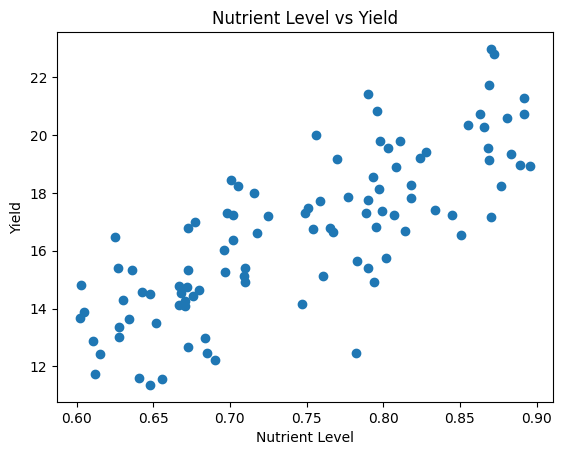

In [ ]:
# Scatter plot
plt.scatter(df["nutrient_level"], df["yield_grams"])
plt.xlabel("Nutrient Level")
plt.ylabel("Yield")
plt.title("Nutrient Level vs Yield")
plt.show()


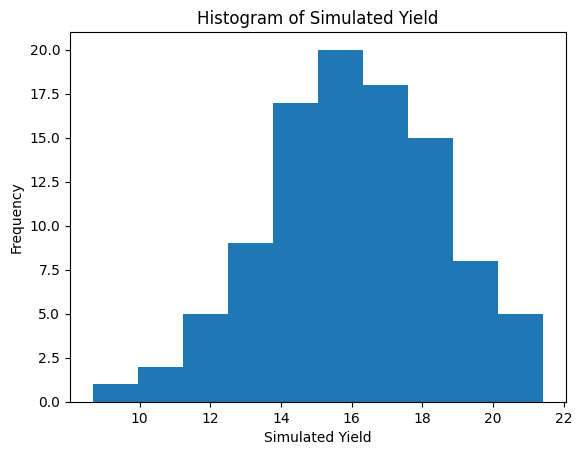

In [ ]:
# Histogram of simulated yields
plt.hist(simulated_yield, bins=10) #no.of bars chosen after exploring diff val, 10 seems good
plt.xlabel("Simulated Yield")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Yield")
plt.show()

# Question 7
This time we have sonar_points.csv, we need to complete following tasks:

- Calculate distances of each point from origin
- Normalize the coordinates (mean 0, variance 1)
- Compute covariance matrix of points
- 2D scatter plot (x vs y)
- Histogram of depth (z)
- Use Pandas to find the top 5 deepest points

In [ ]:
# Load data
df = pd.read_csv("sonar_points.csv")

In [ ]:
# Distance from origin
df["distance"] = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)
# print(df["distance"]) #just to check the output 

In [ ]:
# Normalize (mean 0, variance 1)
normalized = (df[["x", "y", "z"]] - df[["x", "y", "z"]].mean()) / df[["x", "y", "z"]].std()
# print(normalized)

In [ ]:

# Covariance matrix
cov_matrix = np.cov(normalized.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.         -0.06859207  0.02666211]
 [-0.06859207  1.          0.01639318]
 [ 0.02666211  0.01639318  1.        ]]


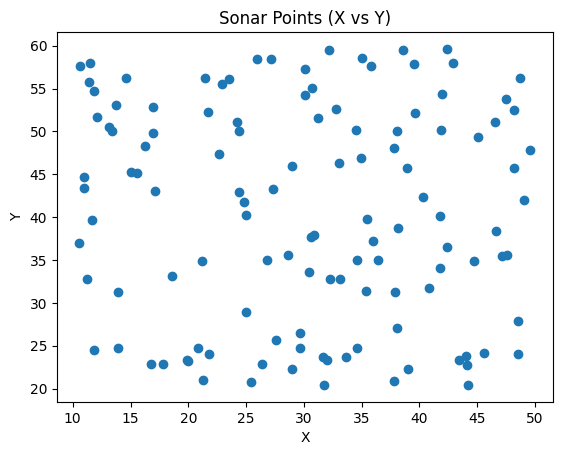

In [ ]:
# Scatter plot (x vs y)
plt.scatter(df["x"], df["y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sonar Points (X vs Y)")
plt.show()

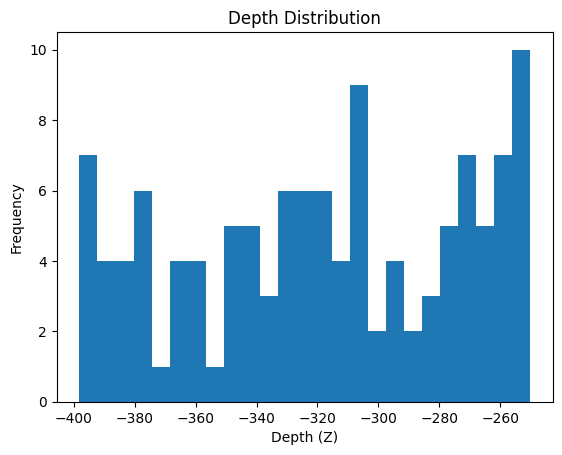

In [ ]:
# Histogram of depth (z)
plt.hist(df["z"], bins=25)
plt.xlabel("Depth (Z)")
plt.ylabel("Frequency")
plt.title("Depth Distribution")
plt.show()

In [ ]:
# Top 5 deepest points
deepest_points = df.sort_values(by="z").head(5)
print(deepest_points)

        x      y       z    distance
0   41.79  40.13 -398.18  402.373127
93  21.20  34.83 -397.82  399.904140
45  30.06  57.23 -396.04  401.281146
87  16.93  52.87 -395.68  399.555408
2   33.08  46.35 -393.53  397.628558


# Question 8
Load (choco_quality.csv) and do following:

- Using Pandas to remove missing values and describe statistics
- Compute a "quality score" = 0.3sugar + 0.7cocoa using numpy
- Generate random noise using np.random.normal using numpy
- Scatter plot cocoa% vs sugar%
- Histogram of weight distribution


In [ ]:

# Load dataset
df = pd.read_csv("choco_quality.csv")
# Remove missing values
df = df.dropna()
# df.head(150)

In [ ]:

# Describe statistics
print(df.describe())

            sugar       cocoa      weight
count  150.000000  150.000000  150.000000
mean    39.253333   58.680000   12.475400
std      5.850700    5.554272    0.814111
min     30.000000   50.000000   10.340000
25%     34.000000   54.000000   11.940000
50%     39.000000   58.000000   12.470000
75%     44.000000   63.000000   13.000000
max     49.000000   69.000000   14.610000


In [ ]:
# Quality score
df["quality_score"] = 0.3 * df["sugar"] + 0.7 * df["cocoa"]
# print(df["quality_score"])

# Random noise
noise = np.random.normal(0, 1, size=len(df))
# print(noise)

#uncomment print lines to see the output

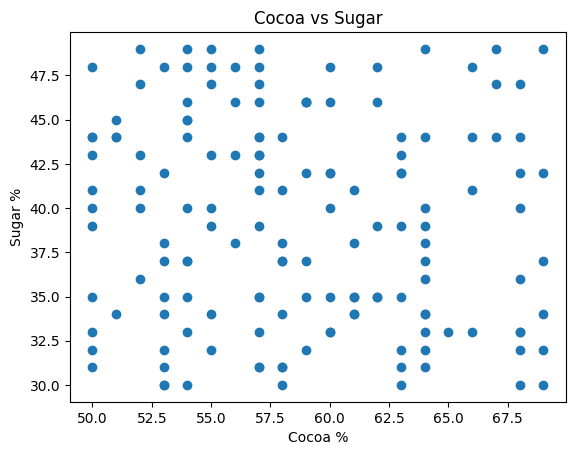

In [ ]:
# Scatter plot
plt.scatter(df["cocoa"], df["sugar"])
plt.xlabel("Cocoa %")
plt.ylabel("Sugar %")
plt.title("Cocoa vs Sugar")
plt.show()


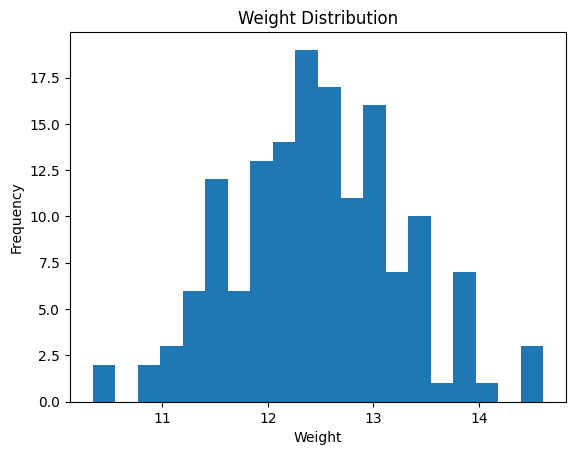

In [ ]:
# Histogram of weight
plt.hist(df["weight"], bins=20)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Weight Distribution")
plt.show()

# Question 9
do following tasks:

- Generate the signals of matrix 4X3 using sine and cosine of random numbers ,generated in range of 0 to 2pie
- Compute the dot product of the two matrices (A · B)
- Compute the cross product row-wise, i.e., for each pair of corresponding rows in A and B, compute: cross(A[i],B[i])

In [ ]:
# Generate random values between 0 and 2π
rand_vals = np.random.uniform(0, 2*np.pi, size=(4, 3))

# Signal matrices
A = np.sin(rand_vals)
B = np.cos(rand_vals)
# print(A)
# print(B)


In [ ]:
# Dot product (A · Bᵀ)
dot_product = np.dot(A, B.T)

print(dot_product)

[[-0.24387064  0.3877017  -0.26569435  0.35127014]
 [ 1.16659439  0.80973787 -0.55701199 -0.18262779]
 [ 0.08444927 -1.50194786 -0.20876275  1.39619469]
 [-0.49865234  0.18238248 -0.25547849  0.6168383 ]]


In [ ]:
cross_products = np.cross(A, B)
print(cross_products)


[[ 0.89333818 -0.96399321  0.6707667 ]
 [-0.87997653 -0.68655579 -0.31368503]
 [ 0.43906535  0.55884728  0.13799523]
 [ 0.76641338  0.11566877 -0.83556865]]
